### **CC57 - MACHINE LEARNING - CLASIFICADOR NAIVE BAYES**

Este conjunto de datos proviene del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales (USA).

El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene diabetes o no, basándose en ciertas mediciones de diagnóstico incluidas en el conjunto de datos.

En particular, todos los pacientes aquí son **mujeres de al menos 21 años de edad** de **ascendencia india Pima**.

El dataset consta de 768 observaciones en 8 variables predictivas médicas y una variable objetivo: **Outcome** (resultado). Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, nivel de insulina, edad, etc.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Principales estadisticas
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.shape

(768, 9)

In [7]:
data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

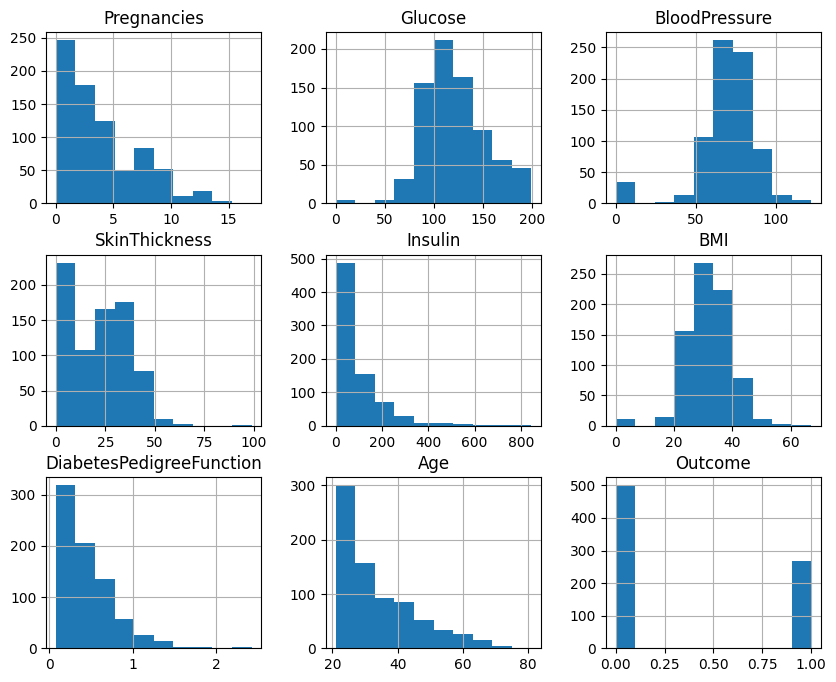

In [9]:
#visualizando los datos
#histograma

data.hist(figsize=(10,8))
plt.show()

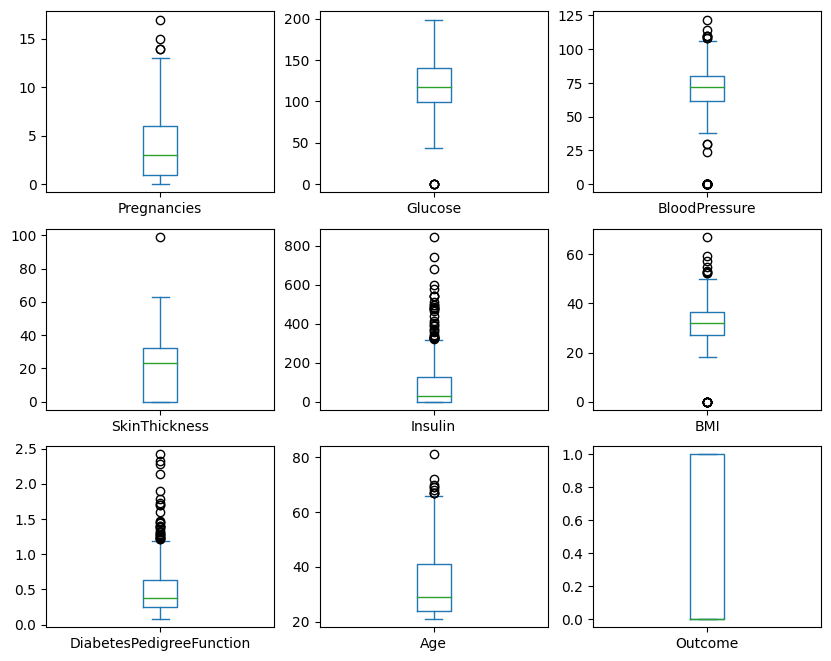

In [10]:
#Boxplot

data.plot(kind='box', subplots = True, layout=(3,3),
          sharex=False, sharey=False, figsize=(10,8))
plt.show()

In [14]:
#Heatmap
#Seleccionando el nombre de la columna

col_x = data.columns[-1]
print(col_x)

Outcome


<Axes: >

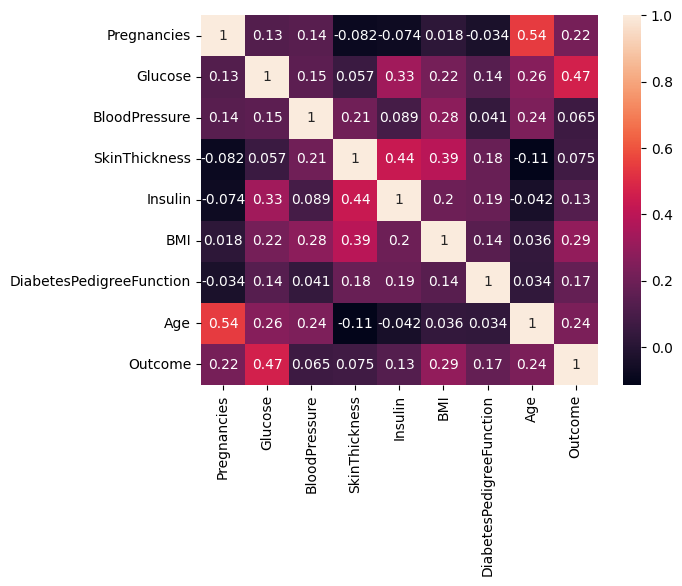

In [16]:
#Heatmap
#Calculando la correlacion entre todos los atributos
corr = data[data.columns].corr()
sns.heatmap(corr, annot=True)

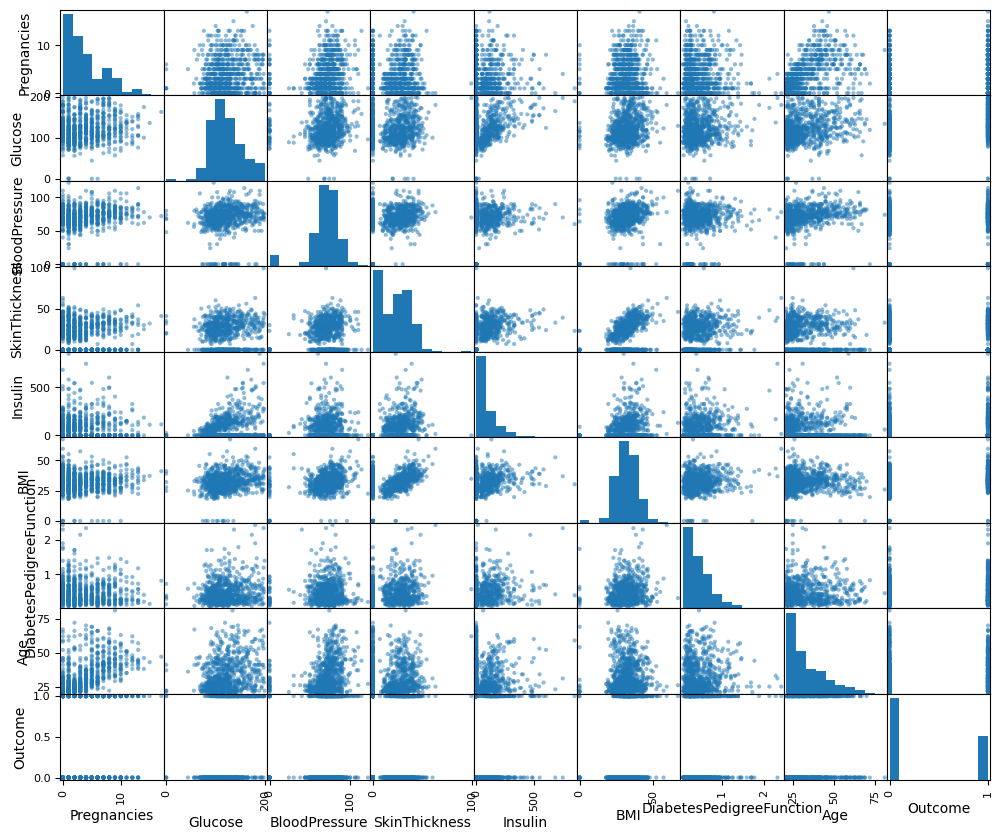

In [25]:
#Scatter Plot
pd.plotting.scatter_matrix(data, figsize=(12,10))
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler

In [47]:
#Seleccionamos todos los atributos del dataset
#menos la clumna objetivo
X = data.iloc[:,0:-1]
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [51]:
#Seleccionamos todos los datos de la clase objetivo
Y = data.iloc[:,8]
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [49]:
#Estandarizamos las variables predictoras

rescalarX = StandardScaler().fit_transform(X)
dataX = pd.DataFrame(data=rescalarX, columns=X.columns)
dataX.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [53]:
#Clasificacion Naive Bayes

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB


In [54]:
X_train, X_test, Y_train, Y_Test = train_test_split(dataX, Y,
                                                    random_state = 22, test_size=0.2)

In [58]:
models = []
models.append(("Naive Bayes", GaussianNB()))

In [59]:
models

[('Naive Bayes', GaussianNB())]

In [64]:
for name, model in models:
  print(name, model)

Naive Bayes GaussianNB()


In [71]:
results = []
names =[]

for name, model in models:
  kfold = KFold(n_splits=10, random_state = 22, shuffle=True)
  cv_result = cross_val_score(model, X_train, Y_train, cv=kfold, scoring= 'accuracy')
  names.append(name)
  results.append(cv_result)

  for i in range(len(names)):
    print(names[i], results[i].mean())

Naive Bayes 0.7703331570597568


In [72]:
print(results[0])

[0.74193548 0.80645161 0.82258065 0.72580645 0.75409836 0.72131148
 0.81967213 0.75409836 0.81967213 0.73770492]


In [70]:
print(results[0].mean())

0.7703331570597568


<ipython-input-73-566f9a5b9f32>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names)


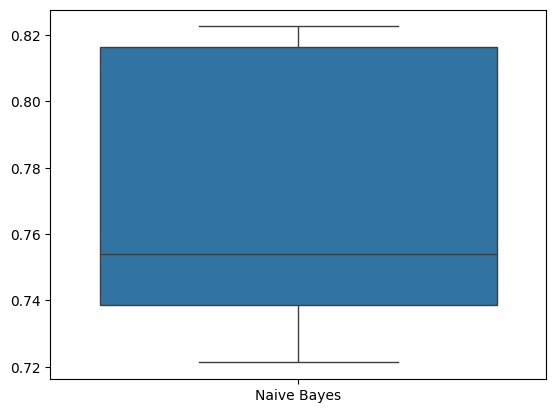

In [73]:
#Visualizacion de resultados

ax = sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.show()

In [74]:
#Evaluacion de resultados

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [78]:
naive = GaussianNB()
naive.fit(X_train, Y_train)
naive_predictions = naive.predict(X_test)

print("Precision del test:")
print(accuracy_score(Y_Test, naive_predictions))
print(classification_report(Y_Test, naive_predictions))

Precision del test:
0.7077922077922078
              precision    recall  f1-score   support

           0       0.73      0.87      0.79       100
           1       0.63      0.41      0.49        54

    accuracy                           0.71       154
   macro avg       0.68      0.64      0.64       154
weighted avg       0.70      0.71      0.69       154



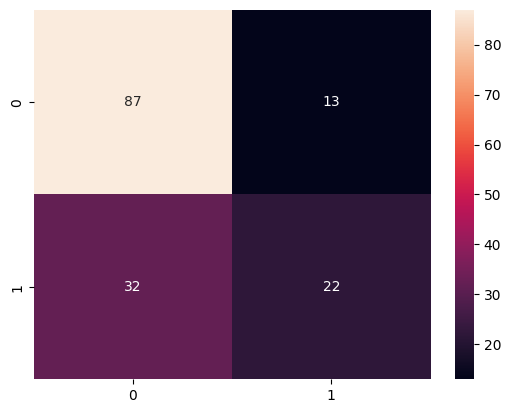

In [79]:
#Visualizacion

conf = confusion_matrix(Y_Test, naive_predictions)
label = ["0","1"]
sns.heatmap(conf, annot=True,
            xticklabels= label, yticklabels=label)

plt.show()